# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
#         print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])
    return costs

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 50)
m, n = np.shape(x)

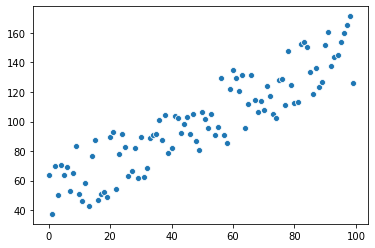

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 464.826782
Iteration 1 | Cost: 460.993511
Iteration 2 | Cost: 457.377369
Iteration 3 | Cost: 453.965756
Iteration 4 | Cost: 450.746804
Iteration 5 | Cost: 447.709333
Iteration 6 | Cost: 444.842812
Iteration 7 | Cost: 442.137321
Iteration 8 | Cost: 439.583516
Iteration 9 | Cost: 437.172596
Iteration 10 | Cost: 434.896269
Iteration 11 | Cost: 432.746725
Iteration 12 | Cost: 430.716609
Iteration 13 | Cost: 428.798990
Iteration 14 | Cost: 426.987341
Iteration 15 | Cost: 425.275513
Iteration 16 | Cost: 423.657716
Iteration 17 | Cost: 422.128492
Iteration 18 | Cost: 420.682704
Iteration 19 | Cost: 419.315511
Iteration 20 | Cost: 418.022352
Iteration 21 | Cost: 416.798932
Iteration 22 | Cost: 415.641207
Iteration 23 | Cost: 414.545364
Iteration 24 | Cost: 413.507814
Iteration 25 | Cost: 412.525175
Iteration 26 | Cost: 411.594263
Iteration 27 | Cost: 410.712075
Iteration 28 | Cost: 409.875788
Iteration 29 | Cost: 409.082737
Iteration 30 | Cost: 408.330416
Iteration 31 | Cos

Iteration 826 | Cost: 332.782120
Iteration 827 | Cost: 332.710162
Iteration 828 | Cost: 332.638225
Iteration 829 | Cost: 332.566310
Iteration 830 | Cost: 332.494418
Iteration 831 | Cost: 332.422547
Iteration 832 | Cost: 332.350697
Iteration 833 | Cost: 332.278870
Iteration 834 | Cost: 332.207065
Iteration 835 | Cost: 332.135281
Iteration 836 | Cost: 332.063520
Iteration 837 | Cost: 331.991780
Iteration 838 | Cost: 331.920062
Iteration 839 | Cost: 331.848366
Iteration 840 | Cost: 331.776692
Iteration 841 | Cost: 331.705039
Iteration 842 | Cost: 331.633408
Iteration 843 | Cost: 331.561799
Iteration 844 | Cost: 331.490212
Iteration 845 | Cost: 331.418647
Iteration 846 | Cost: 331.347104
Iteration 847 | Cost: 331.275582
Iteration 848 | Cost: 331.204082
Iteration 849 | Cost: 331.132604
Iteration 850 | Cost: 331.061147
Iteration 851 | Cost: 330.989713
Iteration 852 | Cost: 330.918300
Iteration 853 | Cost: 330.846909
Iteration 854 | Cost: 330.775539
Iteration 855 | Cost: 330.704192
Iteration 

Iteration 1455 | Cost: 291.584165
Iteration 1456 | Cost: 291.524748
Iteration 1457 | Cost: 291.465349
Iteration 1458 | Cost: 291.405969
Iteration 1459 | Cost: 291.346607
Iteration 1460 | Cost: 291.287262
Iteration 1461 | Cost: 291.227936
Iteration 1462 | Cost: 291.168628
Iteration 1463 | Cost: 291.109338
Iteration 1464 | Cost: 291.050065
Iteration 1465 | Cost: 290.990811
Iteration 1466 | Cost: 290.931575
Iteration 1467 | Cost: 290.872357
Iteration 1468 | Cost: 290.813157
Iteration 1469 | Cost: 290.753975
Iteration 1470 | Cost: 290.694812
Iteration 1471 | Cost: 290.635666
Iteration 1472 | Cost: 290.576538
Iteration 1473 | Cost: 290.517428
Iteration 1474 | Cost: 290.458336
Iteration 1475 | Cost: 290.399262
Iteration 1476 | Cost: 290.340206
Iteration 1477 | Cost: 290.281168
Iteration 1478 | Cost: 290.222148
Iteration 1479 | Cost: 290.163146
Iteration 1480 | Cost: 290.104162
Iteration 1481 | Cost: 290.045196
Iteration 1482 | Cost: 289.986248
Iteration 1483 | Cost: 289.927317
Iteration 1484

Iteration 2502 | Cost: 238.307778
Iteration 2503 | Cost: 238.264580
Iteration 2504 | Cost: 238.221395
Iteration 2505 | Cost: 238.178224
Iteration 2506 | Cost: 238.135066
Iteration 2507 | Cost: 238.091921
Iteration 2508 | Cost: 238.048789
Iteration 2509 | Cost: 238.005670
Iteration 2510 | Cost: 237.962564
Iteration 2511 | Cost: 237.919471
Iteration 2512 | Cost: 237.876392
Iteration 2513 | Cost: 237.833325
Iteration 2514 | Cost: 237.790272
Iteration 2515 | Cost: 237.747232
Iteration 2516 | Cost: 237.704205
Iteration 2517 | Cost: 237.661191
Iteration 2518 | Cost: 237.618190
Iteration 2519 | Cost: 237.575202
Iteration 2520 | Cost: 237.532228
Iteration 2521 | Cost: 237.489266
Iteration 2522 | Cost: 237.446317
Iteration 2523 | Cost: 237.403382
Iteration 2524 | Cost: 237.360459
Iteration 2525 | Cost: 237.317550
Iteration 2526 | Cost: 237.274654
Iteration 2527 | Cost: 237.231771
Iteration 2528 | Cost: 237.188901
Iteration 2529 | Cost: 237.146043
Iteration 2530 | Cost: 237.103199
Iteration 2531

Iteration 3195 | Cost: 211.315037
Iteration 3196 | Cost: 211.280057
Iteration 3197 | Cost: 211.245087
Iteration 3198 | Cost: 211.210128
Iteration 3199 | Cost: 211.175180
Iteration 3200 | Cost: 211.140242
Iteration 3201 | Cost: 211.105315
Iteration 3202 | Cost: 211.070399
Iteration 3203 | Cost: 211.035493
Iteration 3204 | Cost: 211.000597
Iteration 3205 | Cost: 210.965713
Iteration 3206 | Cost: 210.930839
Iteration 3207 | Cost: 210.895976
Iteration 3208 | Cost: 210.861123
Iteration 3209 | Cost: 210.826281
Iteration 3210 | Cost: 210.791449
Iteration 3211 | Cost: 210.756628
Iteration 3212 | Cost: 210.721818
Iteration 3213 | Cost: 210.687018
Iteration 3214 | Cost: 210.652229
Iteration 3215 | Cost: 210.617451
Iteration 3216 | Cost: 210.582683
Iteration 3217 | Cost: 210.547925
Iteration 3218 | Cost: 210.513178
Iteration 3219 | Cost: 210.478442
Iteration 3220 | Cost: 210.443717
Iteration 3221 | Cost: 210.409002
Iteration 3222 | Cost: 210.374297
Iteration 3223 | Cost: 210.339603
Iteration 3224

Iteration 4017 | Cost: 185.873286
Iteration 4018 | Cost: 185.846051
Iteration 4019 | Cost: 185.818824
Iteration 4020 | Cost: 185.791605
Iteration 4021 | Cost: 185.764395
Iteration 4022 | Cost: 185.737193
Iteration 4023 | Cost: 185.710000
Iteration 4024 | Cost: 185.682814
Iteration 4025 | Cost: 185.655637
Iteration 4026 | Cost: 185.628468
Iteration 4027 | Cost: 185.601308
Iteration 4028 | Cost: 185.574156
Iteration 4029 | Cost: 185.547012
Iteration 4030 | Cost: 185.519876
Iteration 4031 | Cost: 185.492748
Iteration 4032 | Cost: 185.465629
Iteration 4033 | Cost: 185.438518
Iteration 4034 | Cost: 185.411415
Iteration 4035 | Cost: 185.384321
Iteration 4036 | Cost: 185.357235
Iteration 4037 | Cost: 185.330157
Iteration 4038 | Cost: 185.303087
Iteration 4039 | Cost: 185.276025
Iteration 4040 | Cost: 185.248972
Iteration 4041 | Cost: 185.221927
Iteration 4042 | Cost: 185.194890
Iteration 4043 | Cost: 185.167862
Iteration 4044 | Cost: 185.140842
Iteration 4045 | Cost: 185.113829
Iteration 4046

Iteration 5023 | Cost: 162.269798
Iteration 5024 | Cost: 162.249749
Iteration 5025 | Cost: 162.229705
Iteration 5026 | Cost: 162.209668
Iteration 5027 | Cost: 162.189637
Iteration 5028 | Cost: 162.169612
Iteration 5029 | Cost: 162.149593
Iteration 5030 | Cost: 162.129580
Iteration 5031 | Cost: 162.109573
Iteration 5032 | Cost: 162.089572
Iteration 5033 | Cost: 162.069578
Iteration 5034 | Cost: 162.049589
Iteration 5035 | Cost: 162.029607
Iteration 5036 | Cost: 162.009631
Iteration 5037 | Cost: 161.989660
Iteration 5038 | Cost: 161.969696
Iteration 5039 | Cost: 161.949738
Iteration 5040 | Cost: 161.929786
Iteration 5041 | Cost: 161.909840
Iteration 5042 | Cost: 161.889900
Iteration 5043 | Cost: 161.869966
Iteration 5044 | Cost: 161.850039
Iteration 5045 | Cost: 161.830117
Iteration 5046 | Cost: 161.810201
Iteration 5047 | Cost: 161.790292
Iteration 5048 | Cost: 161.770388
Iteration 5049 | Cost: 161.750491
Iteration 5050 | Cost: 161.730600
Iteration 5051 | Cost: 161.710714
Iteration 5052

Iteration 5953 | Cost: 146.028766
Iteration 5954 | Cost: 146.013661
Iteration 5955 | Cost: 145.998561
Iteration 5956 | Cost: 145.983465
Iteration 5957 | Cost: 145.968373
Iteration 5958 | Cost: 145.953286
Iteration 5959 | Cost: 145.938204
Iteration 5960 | Cost: 145.923127
Iteration 5961 | Cost: 145.908054
Iteration 5962 | Cost: 145.892985
Iteration 5963 | Cost: 145.877921
Iteration 5964 | Cost: 145.862862
Iteration 5965 | Cost: 145.847807
Iteration 5966 | Cost: 145.832757
Iteration 5967 | Cost: 145.817712
Iteration 5968 | Cost: 145.802671
Iteration 5969 | Cost: 145.787634
Iteration 5970 | Cost: 145.772602
Iteration 5971 | Cost: 145.757575
Iteration 5972 | Cost: 145.742553
Iteration 5973 | Cost: 145.727535
Iteration 5974 | Cost: 145.712521
Iteration 5975 | Cost: 145.697512
Iteration 5976 | Cost: 145.682508
Iteration 5977 | Cost: 145.667508
Iteration 5978 | Cost: 145.652513
Iteration 5979 | Cost: 145.637522
Iteration 5980 | Cost: 145.622536
Iteration 5981 | Cost: 145.607554
Iteration 5982

Iteration 6994 | Cost: 132.550541
Iteration 6995 | Cost: 132.539539
Iteration 6996 | Cost: 132.528540
Iteration 6997 | Cost: 132.517545
Iteration 6998 | Cost: 132.506553
Iteration 6999 | Cost: 132.495564
Iteration 7000 | Cost: 132.484579
Iteration 7001 | Cost: 132.473597
Iteration 7002 | Cost: 132.462618
Iteration 7003 | Cost: 132.451643
Iteration 7004 | Cost: 132.440671
Iteration 7005 | Cost: 132.429702
Iteration 7006 | Cost: 132.418737
Iteration 7007 | Cost: 132.407775
Iteration 7008 | Cost: 132.396817
Iteration 7009 | Cost: 132.385862
Iteration 7010 | Cost: 132.374910
Iteration 7011 | Cost: 132.363961
Iteration 7012 | Cost: 132.353016
Iteration 7013 | Cost: 132.342074
Iteration 7014 | Cost: 132.331135
Iteration 7015 | Cost: 132.320200
Iteration 7016 | Cost: 132.309268
Iteration 7017 | Cost: 132.298340
Iteration 7018 | Cost: 132.287414
Iteration 7019 | Cost: 132.276493
Iteration 7020 | Cost: 132.265574
Iteration 7021 | Cost: 132.254659
Iteration 7022 | Cost: 132.243747
Iteration 7023

Iteration 7354 | Cost: 128.798594
Iteration 7355 | Cost: 128.788735
Iteration 7356 | Cost: 128.778878
Iteration 7357 | Cost: 128.769024
Iteration 7358 | Cost: 128.759173
Iteration 7359 | Cost: 128.749325
Iteration 7360 | Cost: 128.739481
Iteration 7361 | Cost: 128.729639
Iteration 7362 | Cost: 128.719800
Iteration 7363 | Cost: 128.709964
Iteration 7364 | Cost: 128.700131
Iteration 7365 | Cost: 128.690301
Iteration 7366 | Cost: 128.680475
Iteration 7367 | Cost: 128.670651
Iteration 7368 | Cost: 128.660830
Iteration 7369 | Cost: 128.651012
Iteration 7370 | Cost: 128.641197
Iteration 7371 | Cost: 128.631385
Iteration 7372 | Cost: 128.621576
Iteration 7373 | Cost: 128.611770
Iteration 7374 | Cost: 128.601967
Iteration 7375 | Cost: 128.592168
Iteration 7376 | Cost: 128.582371
Iteration 7377 | Cost: 128.572577
Iteration 7378 | Cost: 128.562786
Iteration 7379 | Cost: 128.552998
Iteration 7380 | Cost: 128.543212
Iteration 7381 | Cost: 128.533430
Iteration 7382 | Cost: 128.523651
Iteration 7383

Iteration 8451 | Cost: 119.601961
Iteration 8452 | Cost: 119.594901
Iteration 8453 | Cost: 119.587843
Iteration 8454 | Cost: 119.580787
Iteration 8455 | Cost: 119.573734
Iteration 8456 | Cost: 119.566682
Iteration 8457 | Cost: 119.559633
Iteration 8458 | Cost: 119.552586
Iteration 8459 | Cost: 119.545541
Iteration 8460 | Cost: 119.538498
Iteration 8461 | Cost: 119.531457
Iteration 8462 | Cost: 119.524418
Iteration 8463 | Cost: 119.517382
Iteration 8464 | Cost: 119.510347
Iteration 8465 | Cost: 119.503315
Iteration 8466 | Cost: 119.496285
Iteration 8467 | Cost: 119.489257
Iteration 8468 | Cost: 119.482231
Iteration 8469 | Cost: 119.475208
Iteration 8470 | Cost: 119.468186
Iteration 8471 | Cost: 119.461167
Iteration 8472 | Cost: 119.454150
Iteration 8473 | Cost: 119.447135
Iteration 8474 | Cost: 119.440122
Iteration 8475 | Cost: 119.433111
Iteration 8476 | Cost: 119.426102
Iteration 8477 | Cost: 119.419096
Iteration 8478 | Cost: 119.412091
Iteration 8479 | Cost: 119.405089
Iteration 8480

Iteration 9451 | Cost: 113.514505
Iteration 9452 | Cost: 113.509298
Iteration 9453 | Cost: 113.504093
Iteration 9454 | Cost: 113.498889
Iteration 9455 | Cost: 113.493687
Iteration 9456 | Cost: 113.488487
Iteration 9457 | Cost: 113.483288
Iteration 9458 | Cost: 113.478090
Iteration 9459 | Cost: 113.472895
Iteration 9460 | Cost: 113.467700
Iteration 9461 | Cost: 113.462508
Iteration 9462 | Cost: 113.457317
Iteration 9463 | Cost: 113.452127
Iteration 9464 | Cost: 113.446939
Iteration 9465 | Cost: 113.441753
Iteration 9466 | Cost: 113.436568
Iteration 9467 | Cost: 113.431385
Iteration 9468 | Cost: 113.426204
Iteration 9469 | Cost: 113.421024
Iteration 9470 | Cost: 113.415845
Iteration 9471 | Cost: 113.410668
Iteration 9472 | Cost: 113.405493
Iteration 9473 | Cost: 113.400319
Iteration 9474 | Cost: 113.395147
Iteration 9475 | Cost: 113.389977
Iteration 9476 | Cost: 113.384808
Iteration 9477 | Cost: 113.379640
Iteration 9478 | Cost: 113.374475
Iteration 9479 | Cost: 113.369310
Iteration 9480

Iteration 10450 | Cost: 109.028791
Iteration 10451 | Cost: 109.024950
Iteration 10452 | Cost: 109.021110
Iteration 10453 | Cost: 109.017271
Iteration 10454 | Cost: 109.013433
Iteration 10455 | Cost: 109.009597
Iteration 10456 | Cost: 109.005761
Iteration 10457 | Cost: 109.001927
Iteration 10458 | Cost: 108.998094
Iteration 10459 | Cost: 108.994262
Iteration 10460 | Cost: 108.990431
Iteration 10461 | Cost: 108.986601
Iteration 10462 | Cost: 108.982773
Iteration 10463 | Cost: 108.978946
Iteration 10464 | Cost: 108.975120
Iteration 10465 | Cost: 108.971295
Iteration 10466 | Cost: 108.967471
Iteration 10467 | Cost: 108.963648
Iteration 10468 | Cost: 108.959827
Iteration 10469 | Cost: 108.956006
Iteration 10470 | Cost: 108.952187
Iteration 10471 | Cost: 108.948369
Iteration 10472 | Cost: 108.944553
Iteration 10473 | Cost: 108.940737
Iteration 10474 | Cost: 108.936922
Iteration 10475 | Cost: 108.933109
Iteration 10476 | Cost: 108.929297
Iteration 10477 | Cost: 108.925486
Iteration 10478 | Co

Iteration 11739 | Cost: 104.932830
Iteration 11740 | Cost: 104.930236
Iteration 11741 | Cost: 104.927642
Iteration 11742 | Cost: 104.925049
Iteration 11743 | Cost: 104.922457
Iteration 11744 | Cost: 104.919866
Iteration 11745 | Cost: 104.917276
Iteration 11746 | Cost: 104.914686
Iteration 11747 | Cost: 104.912097
Iteration 11748 | Cost: 104.909509
Iteration 11749 | Cost: 104.906922
Iteration 11750 | Cost: 104.904336
Iteration 11751 | Cost: 104.901750
Iteration 11752 | Cost: 104.899165
Iteration 11753 | Cost: 104.896581
Iteration 11754 | Cost: 104.893998
Iteration 11755 | Cost: 104.891415
Iteration 11756 | Cost: 104.888833
Iteration 11757 | Cost: 104.886252
Iteration 11758 | Cost: 104.883672
Iteration 11759 | Cost: 104.881093
Iteration 11760 | Cost: 104.878514
Iteration 11761 | Cost: 104.875936
Iteration 11762 | Cost: 104.873359
Iteration 11763 | Cost: 104.870783
Iteration 11764 | Cost: 104.868208
Iteration 11765 | Cost: 104.865633
Iteration 11766 | Cost: 104.863059
Iteration 11767 | Co

Iteration 12626 | Cost: 102.915891
Iteration 12627 | Cost: 102.913910
Iteration 12628 | Cost: 102.911930
Iteration 12629 | Cost: 102.909951
Iteration 12630 | Cost: 102.907973
Iteration 12631 | Cost: 102.905995
Iteration 12632 | Cost: 102.904018
Iteration 12633 | Cost: 102.902041
Iteration 12634 | Cost: 102.900065
Iteration 12635 | Cost: 102.898089
Iteration 12636 | Cost: 102.896114
Iteration 12637 | Cost: 102.894140
Iteration 12638 | Cost: 102.892166
Iteration 12639 | Cost: 102.890193
Iteration 12640 | Cost: 102.888221
Iteration 12641 | Cost: 102.886249
Iteration 12642 | Cost: 102.884277
Iteration 12643 | Cost: 102.882307
Iteration 12644 | Cost: 102.880337
Iteration 12645 | Cost: 102.878367
Iteration 12646 | Cost: 102.876398
Iteration 12647 | Cost: 102.874430
Iteration 12648 | Cost: 102.872462
Iteration 12649 | Cost: 102.870495
Iteration 12650 | Cost: 102.868528
Iteration 12651 | Cost: 102.866563
Iteration 12652 | Cost: 102.864597
Iteration 12653 | Cost: 102.862633
Iteration 12654 | Co

Iteration 13782 | Cost: 100.985825
Iteration 13783 | Cost: 100.984432
Iteration 13784 | Cost: 100.983040
Iteration 13785 | Cost: 100.981648
Iteration 13786 | Cost: 100.980257
Iteration 13787 | Cost: 100.978866
Iteration 13788 | Cost: 100.977475
Iteration 13789 | Cost: 100.976085
Iteration 13790 | Cost: 100.974695
Iteration 13791 | Cost: 100.973305
Iteration 13792 | Cost: 100.971917
Iteration 13793 | Cost: 100.970528
Iteration 13794 | Cost: 100.969140
Iteration 13795 | Cost: 100.967752
Iteration 13796 | Cost: 100.966365
Iteration 13797 | Cost: 100.964978
Iteration 13798 | Cost: 100.963592
Iteration 13799 | Cost: 100.962206
Iteration 13800 | Cost: 100.960820
Iteration 13801 | Cost: 100.959435
Iteration 13802 | Cost: 100.958050
Iteration 13803 | Cost: 100.956666
Iteration 13804 | Cost: 100.955282
Iteration 13805 | Cost: 100.953899
Iteration 13806 | Cost: 100.952516
Iteration 13807 | Cost: 100.951133
Iteration 13808 | Cost: 100.949751
Iteration 13809 | Cost: 100.948369
Iteration 13810 | Co

Iteration 14272 | Cost: 100.351742
Iteration 14273 | Cost: 100.350542
Iteration 14274 | Cost: 100.349343
Iteration 14275 | Cost: 100.348144
Iteration 14276 | Cost: 100.346945
Iteration 14277 | Cost: 100.345747
Iteration 14278 | Cost: 100.344549
Iteration 14279 | Cost: 100.343352
Iteration 14280 | Cost: 100.342154
Iteration 14281 | Cost: 100.340958
Iteration 14282 | Cost: 100.339761
Iteration 14283 | Cost: 100.338565
Iteration 14284 | Cost: 100.337369
Iteration 14285 | Cost: 100.336174
Iteration 14286 | Cost: 100.334979
Iteration 14287 | Cost: 100.333784
Iteration 14288 | Cost: 100.332590
Iteration 14289 | Cost: 100.331396
Iteration 14290 | Cost: 100.330203
Iteration 14291 | Cost: 100.329010
Iteration 14292 | Cost: 100.327817
Iteration 14293 | Cost: 100.326624
Iteration 14294 | Cost: 100.325432
Iteration 14295 | Cost: 100.324240
Iteration 14296 | Cost: 100.323049
Iteration 14297 | Cost: 100.321858
Iteration 14298 | Cost: 100.320667
Iteration 14299 | Cost: 100.319477
Iteration 14300 | Co

Iteration 14511 | Cost: 100.075148
Iteration 14512 | Cost: 100.074033
Iteration 14513 | Cost: 100.072918
Iteration 14514 | Cost: 100.071803
Iteration 14515 | Cost: 100.070688
Iteration 14516 | Cost: 100.069574
Iteration 14517 | Cost: 100.068460
Iteration 14518 | Cost: 100.067347
Iteration 14519 | Cost: 100.066234
Iteration 14520 | Cost: 100.065121
Iteration 14521 | Cost: 100.064008
Iteration 14522 | Cost: 100.062896
Iteration 14523 | Cost: 100.061784
Iteration 14524 | Cost: 100.060673
Iteration 14525 | Cost: 100.059562
Iteration 14526 | Cost: 100.058451
Iteration 14527 | Cost: 100.057341
Iteration 14528 | Cost: 100.056230
Iteration 14529 | Cost: 100.055121
Iteration 14530 | Cost: 100.054011
Iteration 14531 | Cost: 100.052902
Iteration 14532 | Cost: 100.051793
Iteration 14533 | Cost: 100.050685
Iteration 14534 | Cost: 100.049577
Iteration 14535 | Cost: 100.048469
Iteration 14536 | Cost: 100.047362
Iteration 14537 | Cost: 100.046255
Iteration 14538 | Cost: 100.045148
Iteration 14539 | Co

Iteration 14785 | Cost: 99.781851
Iteration 14786 | Cost: 99.780825
Iteration 14787 | Cost: 99.779799
Iteration 14788 | Cost: 99.778774
Iteration 14789 | Cost: 99.777748
Iteration 14790 | Cost: 99.776723
Iteration 14791 | Cost: 99.775699
Iteration 14792 | Cost: 99.774674
Iteration 14793 | Cost: 99.773650
Iteration 14794 | Cost: 99.772627
Iteration 14795 | Cost: 99.771603
Iteration 14796 | Cost: 99.770580
Iteration 14797 | Cost: 99.769557
Iteration 14798 | Cost: 99.768535
Iteration 14799 | Cost: 99.767512
Iteration 14800 | Cost: 99.766491
Iteration 14801 | Cost: 99.765469
Iteration 14802 | Cost: 99.764448
Iteration 14803 | Cost: 99.763427
Iteration 14804 | Cost: 99.762406
Iteration 14805 | Cost: 99.761386
Iteration 14806 | Cost: 99.760366
Iteration 14807 | Cost: 99.759346
Iteration 14808 | Cost: 99.758327
Iteration 14809 | Cost: 99.757308
Iteration 14810 | Cost: 99.756289
Iteration 14811 | Cost: 99.755271
Iteration 14812 | Cost: 99.754252
Iteration 14813 | Cost: 99.753235
Iteration 1481

Iteration 15129 | Cost: 99.446633
Iteration 15130 | Cost: 99.445709
Iteration 15131 | Cost: 99.444785
Iteration 15132 | Cost: 99.443861
Iteration 15133 | Cost: 99.442938
Iteration 15134 | Cost: 99.442015
Iteration 15135 | Cost: 99.441092
Iteration 15136 | Cost: 99.440169
Iteration 15137 | Cost: 99.439247
Iteration 15138 | Cost: 99.438325
Iteration 15139 | Cost: 99.437404
Iteration 15140 | Cost: 99.436482
Iteration 15141 | Cost: 99.435561
Iteration 15142 | Cost: 99.434640
Iteration 15143 | Cost: 99.433720
Iteration 15144 | Cost: 99.432800
Iteration 15145 | Cost: 99.431880
Iteration 15146 | Cost: 99.430960
Iteration 15147 | Cost: 99.430040
Iteration 15148 | Cost: 99.429121
Iteration 15149 | Cost: 99.428202
Iteration 15150 | Cost: 99.427284
Iteration 15151 | Cost: 99.426366
Iteration 15152 | Cost: 99.425448
Iteration 15153 | Cost: 99.424530
Iteration 15154 | Cost: 99.423612
Iteration 15155 | Cost: 99.422695
Iteration 15156 | Cost: 99.421778
Iteration 15157 | Cost: 99.420862
Iteration 1515

Iteration 15946 | Cost: 98.778056
Iteration 15947 | Cost: 98.777335
Iteration 15948 | Cost: 98.776615
Iteration 15949 | Cost: 98.775895
Iteration 15950 | Cost: 98.775175
Iteration 15951 | Cost: 98.774455
Iteration 15952 | Cost: 98.773735
Iteration 15953 | Cost: 98.773016
Iteration 15954 | Cost: 98.772297
Iteration 15955 | Cost: 98.771578
Iteration 15956 | Cost: 98.770859
Iteration 15957 | Cost: 98.770141
Iteration 15958 | Cost: 98.769423
Iteration 15959 | Cost: 98.768705
Iteration 15960 | Cost: 98.767987
Iteration 15961 | Cost: 98.767269
Iteration 15962 | Cost: 98.766552
Iteration 15963 | Cost: 98.765835
Iteration 15964 | Cost: 98.765118
Iteration 15965 | Cost: 98.764401
Iteration 15966 | Cost: 98.763684
Iteration 15967 | Cost: 98.762968
Iteration 15968 | Cost: 98.762252
Iteration 15969 | Cost: 98.761536
Iteration 15970 | Cost: 98.760821
Iteration 15971 | Cost: 98.760105
Iteration 15972 | Cost: 98.759390
Iteration 15973 | Cost: 98.758675
Iteration 15974 | Cost: 98.757960
Iteration 1597

Iteration 16492 | Cost: 98.415491
Iteration 16493 | Cost: 98.414880
Iteration 16494 | Cost: 98.414270
Iteration 16495 | Cost: 98.413660
Iteration 16496 | Cost: 98.413051
Iteration 16497 | Cost: 98.412441
Iteration 16498 | Cost: 98.411832
Iteration 16499 | Cost: 98.411223
Iteration 16500 | Cost: 98.410614
Iteration 16501 | Cost: 98.410005
Iteration 16502 | Cost: 98.409396
Iteration 16503 | Cost: 98.408788
Iteration 16504 | Cost: 98.408179
Iteration 16505 | Cost: 98.407571
Iteration 16506 | Cost: 98.406964
Iteration 16507 | Cost: 98.406356
Iteration 16508 | Cost: 98.405748
Iteration 16509 | Cost: 98.405141
Iteration 16510 | Cost: 98.404534
Iteration 16511 | Cost: 98.403927
Iteration 16512 | Cost: 98.403320
Iteration 16513 | Cost: 98.402714
Iteration 16514 | Cost: 98.402107
Iteration 16515 | Cost: 98.401501
Iteration 16516 | Cost: 98.400895
Iteration 16517 | Cost: 98.400289
Iteration 16518 | Cost: 98.399684
Iteration 16519 | Cost: 98.399078
Iteration 16520 | Cost: 98.398473
Iteration 1652

Iteration 16945 | Cost: 98.157213
Iteration 16946 | Cost: 98.156682
Iteration 16947 | Cost: 98.156150
Iteration 16948 | Cost: 98.155619
Iteration 16949 | Cost: 98.155088
Iteration 16950 | Cost: 98.154557
Iteration 16951 | Cost: 98.154026
Iteration 16952 | Cost: 98.153495
Iteration 16953 | Cost: 98.152965
Iteration 16954 | Cost: 98.152434
Iteration 16955 | Cost: 98.151904
Iteration 16956 | Cost: 98.151374
Iteration 16957 | Cost: 98.150844
Iteration 16958 | Cost: 98.150315
Iteration 16959 | Cost: 98.149785
Iteration 16960 | Cost: 98.149256
Iteration 16961 | Cost: 98.148726
Iteration 16962 | Cost: 98.148197
Iteration 16963 | Cost: 98.147668
Iteration 16964 | Cost: 98.147140
Iteration 16965 | Cost: 98.146611
Iteration 16966 | Cost: 98.146083
Iteration 16967 | Cost: 98.145554
Iteration 16968 | Cost: 98.145026
Iteration 16969 | Cost: 98.144498
Iteration 16970 | Cost: 98.143971
Iteration 16971 | Cost: 98.143443
Iteration 16972 | Cost: 98.142915
Iteration 16973 | Cost: 98.142388
Iteration 1697

Iteration 17445 | Cost: 97.910596
Iteration 17446 | Cost: 97.910139
Iteration 17447 | Cost: 97.909683
Iteration 17448 | Cost: 97.909226
Iteration 17449 | Cost: 97.908770
Iteration 17450 | Cost: 97.908314
Iteration 17451 | Cost: 97.907858
Iteration 17452 | Cost: 97.907403
Iteration 17453 | Cost: 97.906947
Iteration 17454 | Cost: 97.906492
Iteration 17455 | Cost: 97.906036
Iteration 17456 | Cost: 97.905581
Iteration 17457 | Cost: 97.905126
Iteration 17458 | Cost: 97.904671
Iteration 17459 | Cost: 97.904216
Iteration 17460 | Cost: 97.903762
Iteration 17461 | Cost: 97.903307
Iteration 17462 | Cost: 97.902853
Iteration 17463 | Cost: 97.902399
Iteration 17464 | Cost: 97.901945
Iteration 17465 | Cost: 97.901491
Iteration 17466 | Cost: 97.901037
Iteration 17467 | Cost: 97.900583
Iteration 17468 | Cost: 97.900130
Iteration 17469 | Cost: 97.899676
Iteration 17470 | Cost: 97.899223
Iteration 17471 | Cost: 97.898770
Iteration 17472 | Cost: 97.898317
Iteration 17473 | Cost: 97.897864
Iteration 1747

Iteration 17944 | Cost: 97.699197
Iteration 17945 | Cost: 97.698805
Iteration 17946 | Cost: 97.698413
Iteration 17947 | Cost: 97.698021
Iteration 17948 | Cost: 97.697629
Iteration 17949 | Cost: 97.697237
Iteration 17950 | Cost: 97.696845
Iteration 17951 | Cost: 97.696454
Iteration 17952 | Cost: 97.696062
Iteration 17953 | Cost: 97.695671
Iteration 17954 | Cost: 97.695280
Iteration 17955 | Cost: 97.694889
Iteration 17956 | Cost: 97.694498
Iteration 17957 | Cost: 97.694107
Iteration 17958 | Cost: 97.693717
Iteration 17959 | Cost: 97.693326
Iteration 17960 | Cost: 97.692936
Iteration 17961 | Cost: 97.692545
Iteration 17962 | Cost: 97.692155
Iteration 17963 | Cost: 97.691765
Iteration 17964 | Cost: 97.691375
Iteration 17965 | Cost: 97.690985
Iteration 17966 | Cost: 97.690596
Iteration 17967 | Cost: 97.690206
Iteration 17968 | Cost: 97.689817
Iteration 17969 | Cost: 97.689427
Iteration 17970 | Cost: 97.689038
Iteration 17971 | Cost: 97.688649
Iteration 17972 | Cost: 97.688260
Iteration 1797

Iteration 18279 | Cost: 97.574264
Iteration 18280 | Cost: 97.573910
Iteration 18281 | Cost: 97.573556
Iteration 18282 | Cost: 97.573202
Iteration 18283 | Cost: 97.572848
Iteration 18284 | Cost: 97.572494
Iteration 18285 | Cost: 97.572140
Iteration 18286 | Cost: 97.571787
Iteration 18287 | Cost: 97.571434
Iteration 18288 | Cost: 97.571080
Iteration 18289 | Cost: 97.570727
Iteration 18290 | Cost: 97.570374
Iteration 18291 | Cost: 97.570021
Iteration 18292 | Cost: 97.569668
Iteration 18293 | Cost: 97.569315
Iteration 18294 | Cost: 97.568963
Iteration 18295 | Cost: 97.568610
Iteration 18296 | Cost: 97.568257
Iteration 18297 | Cost: 97.567905
Iteration 18298 | Cost: 97.567553
Iteration 18299 | Cost: 97.567201
Iteration 18300 | Cost: 97.566849
Iteration 18301 | Cost: 97.566497
Iteration 18302 | Cost: 97.566145
Iteration 18303 | Cost: 97.565793
Iteration 18304 | Cost: 97.565442
Iteration 18305 | Cost: 97.565090
Iteration 18306 | Cost: 97.564739
Iteration 18307 | Cost: 97.564387
Iteration 1830

Iteration 18597 | Cost: 97.466898
Iteration 18598 | Cost: 97.466577
Iteration 18599 | Cost: 97.466255
Iteration 18600 | Cost: 97.465934
Iteration 18601 | Cost: 97.465613
Iteration 18602 | Cost: 97.465292
Iteration 18603 | Cost: 97.464970
Iteration 18604 | Cost: 97.464650
Iteration 18605 | Cost: 97.464329
Iteration 18606 | Cost: 97.464008
Iteration 18607 | Cost: 97.463687
Iteration 18608 | Cost: 97.463367
Iteration 18609 | Cost: 97.463046
Iteration 18610 | Cost: 97.462726
Iteration 18611 | Cost: 97.462406
Iteration 18612 | Cost: 97.462086
Iteration 18613 | Cost: 97.461766
Iteration 18614 | Cost: 97.461446
Iteration 18615 | Cost: 97.461126
Iteration 18616 | Cost: 97.460806
Iteration 18617 | Cost: 97.460487
Iteration 18618 | Cost: 97.460167
Iteration 18619 | Cost: 97.459848
Iteration 18620 | Cost: 97.459528
Iteration 18621 | Cost: 97.459209
Iteration 18622 | Cost: 97.458890
Iteration 18623 | Cost: 97.458571
Iteration 18624 | Cost: 97.458252
Iteration 18625 | Cost: 97.457933
Iteration 1862

Iteration 18933 | Cost: 97.364201
Iteration 18934 | Cost: 97.363911
Iteration 18935 | Cost: 97.363620
Iteration 18936 | Cost: 97.363330
Iteration 18937 | Cost: 97.363040
Iteration 18938 | Cost: 97.362751
Iteration 18939 | Cost: 97.362461
Iteration 18940 | Cost: 97.362171
Iteration 18941 | Cost: 97.361881
Iteration 18942 | Cost: 97.361592
Iteration 18943 | Cost: 97.361302
Iteration 18944 | Cost: 97.361013
Iteration 18945 | Cost: 97.360724
Iteration 18946 | Cost: 97.360435
Iteration 18947 | Cost: 97.360146
Iteration 18948 | Cost: 97.359857
Iteration 18949 | Cost: 97.359568
Iteration 18950 | Cost: 97.359279
Iteration 18951 | Cost: 97.358990
Iteration 18952 | Cost: 97.358701
Iteration 18953 | Cost: 97.358413
Iteration 18954 | Cost: 97.358124
Iteration 18955 | Cost: 97.357836
Iteration 18956 | Cost: 97.357548
Iteration 18957 | Cost: 97.357260
Iteration 18958 | Cost: 97.356971
Iteration 18959 | Cost: 97.356683
Iteration 18960 | Cost: 97.356395
Iteration 18961 | Cost: 97.356108
Iteration 1896

Iteration 19316 | Cost: 97.259262
Iteration 19317 | Cost: 97.259004
Iteration 19318 | Cost: 97.258745
Iteration 19319 | Cost: 97.258487
Iteration 19320 | Cost: 97.258229
Iteration 19321 | Cost: 97.257971
Iteration 19322 | Cost: 97.257713
Iteration 19323 | Cost: 97.257455
Iteration 19324 | Cost: 97.257198
Iteration 19325 | Cost: 97.256940
Iteration 19326 | Cost: 97.256683
Iteration 19327 | Cost: 97.256425
Iteration 19328 | Cost: 97.256168
Iteration 19329 | Cost: 97.255910
Iteration 19330 | Cost: 97.255653
Iteration 19331 | Cost: 97.255396
Iteration 19332 | Cost: 97.255139
Iteration 19333 | Cost: 97.254882
Iteration 19334 | Cost: 97.254625
Iteration 19335 | Cost: 97.254368
Iteration 19336 | Cost: 97.254111
Iteration 19337 | Cost: 97.253854
Iteration 19338 | Cost: 97.253598
Iteration 19339 | Cost: 97.253341
Iteration 19340 | Cost: 97.253085
Iteration 19341 | Cost: 97.252828
Iteration 19342 | Cost: 97.252572
Iteration 19343 | Cost: 97.252316
Iteration 19344 | Cost: 97.252059
Iteration 1934

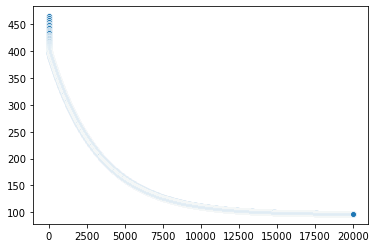

In [6]:
numEpochs= 20000 #how many steps it's going to take
alpha = 0.0006 #learning rate
theta = np.array([1.9059518,1.534264]) #slope you're starting at
costs = gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise